# A/B Testing Case Study

#### The objective of this analysis is to determine which banner ad format is more effective in driving engagement and clicks.

In [1]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Each performance metric is in a separate csv. Write a python script to merge those performance metrics for each channel. The output should be easily readable.

In [2]:
#Load datasets
linkedin_clicks = pd.read_csv("linkedin-clicks 1.csv")
instagram_clicks = pd.read_csv("instagram clicks 1.csv")
twitter_clicks = pd.read_csv("linkedin-clicks 1.csv")

linkedin_impressions = pd.read_csv("linkedin-impressions 1.csv")
twitter_impressions = pd.read_csv("twitter-impressions.csv")



In [3]:
# Add the "Channel" column
linkedin_clicks["Channel"] = "linkedin"
instagram_clicks["Channel"] = "instagram"
twitter_clicks["Channel"] = "twitter"

# Add the "Channel" column
linkedin_impressions["Channel"] = "linkedin"
twitter_impressions["Channel"] = "twitter"

# Merge the datasets into one dataframe
all_clicks = pd.concat([linkedin_clicks, instagram_clicks, twitter_clicks], ignore_index=True)
all_impressions = pd.concat([linkedin_impressions, twitter_impressions], ignore_index=True)

In [4]:
all_clicks.head()

,Banner Ad Name,Click ID,Link/Button Clicked On,Link/Button URL,Datetime,State,Gender,Income Level,Channel
0,Banner 1 - Short,5859,Unsubscribe,https://example.com/learn,04/07/2024 23:19,California,Female,High,linkedin
1,Banner 1 - Short,8914,Unsubscribe,https://example.com/learn,30/07/2024 20:32,Texas,Male,High,linkedin
2,Banner 1 - Short,2315,Sign Up,https://example.com/signup,12/07/2024 02:21,Illinois,Male,High,linkedin
3,Banner 1 - Short,6910,Learn More,https://example.com/hide_banner_add,21/07/2024 23:42,New York,Male,Low,linkedin
4,Banner 2 - Long,3075,Unsubscribe,https://example.com/learn,12/07/2024 07:54,Illinois,Undisclosed,High,linkedin


In [5]:
all_impressions.head()

,Banner Ad Name,Impressions,Datetime,Channel
0,Banner 2 - Long,179,07/07/2024,linkedin
1,Banner 2 - Long,416,04/07/2024,linkedin
2,Banner 2 - Long,101,16/07/2024,linkedin
3,Banner 1 - Short,420,19/07/2024,linkedin
4,Banner 2 - Long,211,11/07/2024,linkedin


In [6]:
# Rename banner names
all_clicks["Banner Ad Name"] =all_clicks["Banner Ad Name"].replace({"Banner 2 - Long": "Long","Banner 1 - Short": "Short"})
all_impressions["Banner Ad Name"] =all_impressions["Banner Ad Name"].replace({"Banner 2 - Long": "Long","Banner 1 - Short": "Short"})
all_clicks

,Banner Ad Name,Click ID,Link/Button Clicked On,Link/Button URL,Datetime,State,Gender,Income Level,Channel
0,Short,5859,Unsubscribe,https://example.com/learn,04/07/2024 23:19,California,Female,High,linkedin
1,Short,8914,Unsubscribe,https://example.com/learn,30/07/2024 20:32,Texas,Male,High,linkedin
2,Short,2315,Sign Up,https://example.com/signup,12/07/2024 02:21,Illinois,Male,High,linkedin
3,Short,6910,Learn More,https://example.com/hide_banner_add,21/07/2024 23:42,New York,Male,Low,linkedin
4,Long,3075,Unsubscribe,https://example.com/learn,12/07/2024 07:54,Illinois,Undisclosed,High,linkedin
...,...,...,...,...,...,...,...,...,...
658,Long,7580,Sign Up,https://example.com/hide_banner_add,30/07/2024 00:15,Illinois,Female,Middle,twitter
659,Short,5342,Sign Up,https://example.com/learn,04/07/2024 13:27,New York,Female,High,twitter
660,Short,7817,Learn More,https://example.com/signup,30/07/2024 05:53,Illinois,Male,High,twitter
661,Long,4387,Sign Up,https://example.com/hide_banner_add,19/07/2024 06:51,California,Female,Middle,twitter


In [7]:
all_clicks.to_csv("all_clicks.csv", index=False)
all_impressions.to_csv("all_impressions.csv", index=False)

### EDA for Clicks

In [8]:
all_clicks["Link/Button Clicked On"].value_counts()

Link/Button Clicked On
Unsubscribe    239
Learn More     220
Sign Up        204
Name: count, dtype: int64

In [9]:
all_clicks["Link/Button URL"].value_counts()

Link/Button URL
https://example.com/signup             241
https://example.com/hide_banner_add    213
https://example.com/learn              209
Name: count, dtype: int64

In [10]:
#Select Adds which were "Hide Ads"
hide_ads = all_clicks[all_clicks["Link/Button URL"] == "https://example.com/hide_banner_add"]


#### 1.	Identify which banner ad format (short/long) had the highest number of hide ads clicked due to "Not interested in ad" across all marketing channels.

In [11]:
# SQL
# SELECT banner_ad_name
# FROM (
#    SELECT banner_ad_name, COUNT(*) as total,
#           RANK() OVER (ORDER BY COUNT(*) DESC) as rank
#    FROM data
#    WHERE "Link/Button URL" = 'https://example.com/hide_banner_ad'
#    GROUP BY banner_ad_name
# ) subquery
# WHERE rank = 1;

In [12]:
x1 = hide_ads.groupby("Banner Ad Name").size().reset_index(name="Total")
x1

,Banner Ad Name,Total
0,Long,71
1,Short,142


In [13]:
x2 = hide_ads.groupby(["Channel","Banner Ad Name"]).size().reset_index(name="Total")
x2

,Channel,Banner Ad Name,Total
0,instagram,Long,19
1,instagram,Short,98
2,linkedin,Long,26
3,linkedin,Short,22
4,twitter,Long,26
5,twitter,Short,22


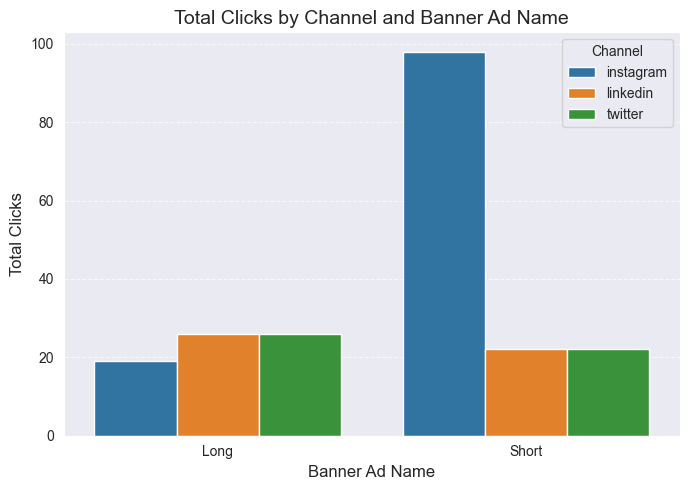

In [14]:

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(data=x2, x="Banner Ad Name", y="Total", hue="Channel")

# Customize the plot
plt.title("Total Clicks by Channel and Banner Ad Name", fontsize=14)
plt.xlabel("Banner Ad Name", fontsize=12)
plt.ylabel("Total Clicks", fontsize=12)
plt.legend(title="Channel", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### 2.	Find out which banner ad type had the highest number of impressions but the lowest number of clicks across all channels

In [15]:
clicks = all_clicks.groupby("Banner Ad Name").size().reset_index(name="Total")
clicks

,Banner Ad Name,Total
0,Long,217
1,Short,446


In [16]:
impressions = all_impressions.groupby("Banner Ad Name")["Impressions"].sum().reset_index(name="Total Impressions")
impressions

,Banner Ad Name,Total Impressions
0,Long,7586
1,Short,4278


In [17]:
#SQL
# WITH First AS (
#     SELECT banner_ad_name, SUM(Impressions) as total_impressions
#     FROM data
#     GROUP BY banner_ad_name
#     ORDER BY total_impressions DESC
#     LIMIT 1
# ),
# Second AS (
#     SELECT banner_ad_name, COUNT(*) as total_clicks
#     FROM data2
#     GROUP BY banner_ad_name
#     ORDER BY total_clicks ASC
#     LIMIT 1
# )
# SELECT First.banner_ad_name
# FROM First
# JOIN Second ON First.banner_ad_name = Second.banner_ad_name;

### 3.	Determine the most effective marketing channel in terms of generating clicks, relative to the number of impressions.

In [18]:
#We need total number of clicks and impressions for each channel
channel_clicks = all_clicks.groupby("Channel").size().reset_index(name="Total Clicks")
channel_clicks


,Channel,Total Clicks
0,instagram,395
1,linkedin,134
2,twitter,134


In [19]:
channel_impressions = all_impressions.groupby("Channel")["Impressions"].sum().reset_index(name="Total Impressions")
channel_impressions

,Channel,Total Impressions
0,linkedin,5661
1,twitter,6203


In [20]:
alls = channel_clicks.merge(channel_impressions, on="Channel",how="left")
alls["CTR"] = alls["Total Clicks"]/alls["Total Impressions"]
alls

,Channel,Total Clicks,Total Impressions,CTR
0,instagram,395,NaN,NaN
1,linkedin,134,5661.0,0.023671
2,twitter,134,6203.0,0.021602


In [21]:
# WITH Clicks AS (
#     SELECT channel, COUNT(*) as total_clicks
#     FROM data
#     GROUP BY channel
# ),
# Impressions AS (
#     SELECT channel, SUM(impressions) as total_impressions
#     FROM data2
#     GROUP BY channel
# )
# SELECT
#     c.channel,
#     SUM(c.total_clicks) / SUM(i.total_impressions) as click_rate
# FROM Clicks c
# JOIN Impressions i ON c.channel = i.channel

### 4.	Identify the hide ads click rate per reason for each banner ad type across all channels

In [22]:
hide_ads

,Banner Ad Name,Click ID,Link/Button Clicked On,Link/Button URL,Datetime,State,Gender,Income Level,Channel
3,Short,6910,Learn More,https://example.com/hide_banner_add,21/07/2024 23:42,New York,Male,Low,linkedin
11,Long,2359,Sign Up,https://example.com/hide_banner_add,01/07/2024 10:28,Florida,Male,Low,linkedin
16,Long,2217,Sign Up,https://example.com/hide_banner_add,04/07/2024 05:48,California,Male,High,linkedin
17,Long,2113,Learn More,https://example.com/hide_banner_add,15/07/2024 15:43,Florida,Male,Middle,linkedin
19,Short,9765,Sign Up,https://example.com/hide_banner_add,22/07/2024 18:13,California,Female,High,linkedin
...,...,...,...,...,...,...,...,...,...
649,Long,5832,Learn More,https://example.com/hide_banner_add,12/07/2024 22:05,Texas,Male,Low,twitter
655,Short,7803,Learn More,https://example.com/hide_banner_add,30/07/2024 11:09,Illinois,Undisclosed,High,twitter
656,Long,1154,Unsubscribe,https://example.com/hide_banner_add,16/07/2024 15:16,California,Female,High,twitter
658,Long,7580,Sign Up,https://example.com/hide_banner_add,30/07/2024 00:15,Illinois,Female,Middle,twitter


In [23]:
clicks_per_person = hide_ads.groupby(["Click ID","Channel","Banner Ad Name"]).size().reset_index(name="Clicks")
clicks_per_person

,Click ID,Channel,Banner Ad Name,Clicks
0,1065,instagram,Long,1
1,1154,linkedin,Long,1
2,1154,twitter,Long,1
3,1187,linkedin,Long,1
4,1187,twitter,Long,1
...,...,...,...,...
208,9837,twitter,Short,1
209,9882,linkedin,Short,1
210,9882,twitter,Short,1
211,9932,instagram,Short,1


In [24]:
clicks_per_persons = clicks_per_person.groupby(["Click ID","Banner Ad Name"]).sum("Clicks").reset_index().sort_values(by=["Clicks"],ascending=False)
clicks_per_persons

,Click ID,Banner Ad Name,Clicks
68,4387,Short,3
141,8997,Short,3
1,1154,Long,2
23,2159,Short,2
14,1751,Short,2
...,...,...,...
155,9513,Short,1
158,9779,Short,1
156,9597,Short,1
161,9932,Short,1
